## Data Science:: Healthcare - Persistency of a drug:: Group Project

### Problem Statement:
One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.
### ML Problem:
With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.
#### Target Variable: Persistency_Flag
### Task:
• Problem understanding  
• Data Understanding  
• Data Cleaning and Feature engineering  
• Model Development  
• Model Selection  
• Model Evaluation  
• Report the accuracy, precision and recall of both the class of target variable  
• Report ROC-AUC as well  
• Deploy the model  
• Explain the challenges and model selection   

### Feature Description:
##### Bucket	
    • Variable	Variable Description  
##### Unique Row 
    • Id	Patient ID	Unique ID of each patient  
##### Target Variable	
    • Persistency_Flag	Flag indicating if a patient was persistent or not  
##### Demographics	
    • Age	Age of the patient during their therapy  
	• Race	Race of the patient from the patient table  
	• Region	Region of the patient from the patient table  
	• Ethnicity	Ethnicity of the patient from the patient table  
	• Gender	Gender of the patient from the patient table  
	• IDN Indicator	Flag indicating patients mapped to IDN  
##### Provider Attributes	
    • NTM - Physician Specialty	Specialty of the HCP that prescribed the NTM Rx  
##### Clinical Factors	  
    • NTM - T-Score 	T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)  
	• Change in T Score 	Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)  
	• NTM - Risk Segment	Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)  
	• Change in Risk Segment	Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)  
	• NTM - Multiple Risk Factors	Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)  
	• NTM - Dexa Scan Frequency	Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)  
	• NTM - Dexa Scan Recency	Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)  
	• Dexa During Therapy	Flag indicating if the patient had a Dexa Scan during their first continuous therapy  
	• NTM - Fragility Fracture Recency	Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)  
	• Fragility Fracture During Therapy	Flag indicating if the patient had fragility fracture  during their first continuous therapy  
	• NTM - Glucocorticoid Recency	Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx  
	• Glucocorticoid Usage During Therapy	Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy  
##### Disease/Treatment Factor  	
    • NTM - Injectable Experience	Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx    
	• NTM - Risk Factors	Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx   
	• NTM - Comorbidity 	Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied  
	• NTM - Concomitancy	Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)  
	• Adherence	Adherence for the therapies  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, linear_model, ensemble, neighbors, metrics,feature_selection
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve


## Exploratory Data Analysis & Modeling

1) Data Preparation  
2) Data Exploration  
3) Exploratory Data Analysis  
4) Data Processing & Wrangling  
5) Feature Engineering  
6) <b>Feature Scaling</b>  
    - One-hot encoding
    - Normalize data
    - Split data
    - Handle Imbalance data
7) <b>Modeling</b>  
    - Logistic Regression
    - K-Nearest Neighbor
    - Random Forest
    - Decision Tree Classifier
    - SVC
    - Bernoulli Naive Bayes
    - XGBoost Classifier
8) <b>Model Evaluation</b> 
    - ROC AUC Curve
    - Confusion Metrics
9) <b>Final Model Selection</b>
10) Deployment  

In [2]:
# Load Data
data = pd.ExcelFile('Healthcare_dataset.xlsx')
df = pd.read_excel(data, 'Dataset')

In [3]:
# Our selected features
important_col = ['Race', 'Ntm_Speciality', 'Ntm_Speciality_Bucket', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Immobilization', 'Dexa_Freq_During_Rx']
print(f'These are our selected features to build model: {important_col}')
df = df[['Persistency_Flag'] + important_col]
df.head()

These are our selected features to build model: ['Race', 'Ntm_Speciality', 'Ntm_Speciality_Bucket', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetic

,Persistency_Flag,Race,Ntm_Speciality,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_During_Rx,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,...,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Immobilization,Dexa_Freq_During_Rx
0,Persistent,Caucasian,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,N,N,VLR_LR,<=-2.5,No change,Unknown,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Asian,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,N,N,Unknown,Unknown,Unknown,Unknown,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Other/Unknown,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,N,N,HR_VHR,<=-2.5,No change,No change,...,N,N,N,N,N,N,N,N,N,0
3,Non-Persistent,Caucasian,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,Y,N,HR_VHR,<=-2.5,No change,No change,...,N,N,N,N,N,Y,N,N,N,0
4,Non-Persistent,Caucasian,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,Y,N,Unknown,Unknown,Unknown,Unknown,...,N,N,N,N,N,N,N,N,N,0


In [4]:
y = df['Persistency_Flag']
df_new = df.drop('Persistency_Flag', axis = 1)


In [5]:
# One-Hot Encoding for target variable
#y = pd.get_dummies(y)
#y = y.Persistent

In [6]:
# One-Hot Encoding
df_new = pd.concat([df_new, pd.get_dummies(df_new[df_new.select_dtypes('object').columns])], axis=1)
df_new = df_new.drop(df_new.select_dtypes('object').columns, axis =1)
df_new.head()

,Dexa_Freq_During_Rx,Race_African American,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL NURSE SPECIALIST,Ntm_Speciality_EMERGENCY MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,...,Concom_Anaesthetics_General_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Concom_Viral_Vaccines_Y,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hyperthyroidism_Y,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Chronic_Hypogonadism_Y,Risk_Immobilization_N,Risk_Immobilization_Y
0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


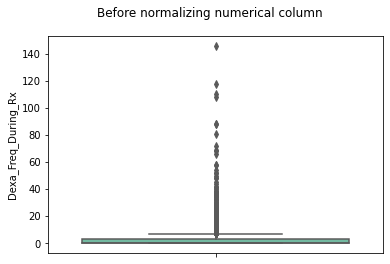

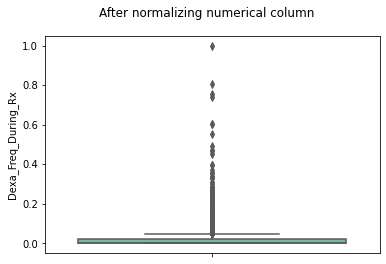

In [7]:
# Normalizing Numerical variables

# we need to normalize our numerical column. 'Dexa_Freq_During_Rx'
sns.boxplot(data=df_new, y='Dexa_Freq_During_Rx', color = '#68c4a4')
plt.suptitle('Before normalizing numerical column')
plt.show()

min_max_scaler=preprocessing.MinMaxScaler()
df_new=pd.DataFrame(min_max_scaler.fit_transform(df_new),columns=df_new.columns)
df_new.head()

sns.boxplot(data=df_new, y='Dexa_Freq_During_Rx', color = '#68c4a4')
plt.suptitle('After normalizing numerical column')
plt.show()

## Splitting data in to train, test set (80%, 20%)    

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.15, random_state=50, stratify = y)
# stratified sampling is a method of sampling data points such that the resulting subsets of data have the same proportion of the target variable as the original dataset.

print(f"X_train shape: {X_train.shape}. y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}. y_test shape: {y_test.shape}")

X_train shape: (2910, 106). y_train shape: (2910,)
X_test shape: (514, 106). y_test shape: (514,)


In [9]:
# Upsampling
# Since 62.4% of records are 'Persistent', we're going to use upsampling method to balance data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_balanced, y_balanced = sm.fit_resample(X_train, y_train)
print(f"X_train shape: {X_balanced.shape}. y_train shape: {y_balanced.shape}")
print(y_balanced.value_counts())

#X_train = s.fit_transform(X_train)

X_train shape: (3630, 106). y_train shape: (3630,)
Non-Persistent    1815
Persistent        1815
Name: Persistency_Flag, dtype: int64


### Logistic Regression

In [10]:
lr = LogisticRegression(random_state = 42, max_iter=400)
lr.fit(X_balanced,y_balanced)

from sklearn.model_selection import cross_validate, cross_val_predict
cv_results = cross_validate(lr, X_balanced, y_balanced, cv=5, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])

# Print average evaluation metrics across all folds
print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std() * 2))
print("F1 score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))

# Generate classification report
y_pred = cross_val_predict(lr, X_balanced, y_balanced, cv=5)
target_names = ['Persistent', 'Non-Persistent']
print(classification_report(y_balanced, y_pred, target_names=target_names))

Precision: 0.80 (+/- 0.04)
Recall: 0.80 (+/- 0.04)
F1 score: 0.80 (+/- 0.04)
Accuracy: 0.80 (+/- 0.04)
                precision    recall  f1-score   support

    Persistent       0.78      0.82      0.80      1815
Non-Persistent       0.81      0.77      0.79      1815

      accuracy                           0.80      3630
     macro avg       0.80      0.80      0.80      3630
  weighted avg       0.80      0.80      0.80      3630



In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors=100,weights="distance")  
knn.fit(X_balanced, y_balanced)  

cv_results = cross_validate(knn, X_balanced, y_balanced, cv=5, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])

# Print average evaluation metrics across all folds
print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std() * 2))
print("F1 score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))

# Generate classification report
y_pred = cross_val_predict(knn, X_balanced, y_balanced, cv=5)
target_names = ['Persistent', 'Non-Persistent']
print(classification_report(y_balanced, y_pred, target_names=target_names))

Precision: 0.80 (+/- 0.03)
Recall: 0.78 (+/- 0.03)
F1 score: 0.78 (+/- 0.03)
Accuracy: 0.78 (+/- 0.03)
                precision    recall  f1-score   support

    Persistent       0.73      0.89      0.80      1815
Non-Persistent       0.86      0.66      0.75      1815

      accuracy                           0.78      3630
     macro avg       0.79      0.78      0.78      3630
  weighted avg       0.79      0.78      0.78      3630



In [12]:
# rf
rf = RandomForestClassifier(n_estimators=10 ,n_jobs=-1,
                            random_state=42, 
                            max_depth= 5
                           # class_weight="balanced",
                            #max_features=10)
                            )

rf.fit(X_balanced, y_balanced)
cv_results = cross_validate(rf, X_balanced, y_balanced, cv=5, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])

# Print average evaluation metrics across all folds
print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std() * 2))
print("F1 score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))

# Generate classification report
y_pred = cross_val_predict(rf, X_balanced, y_balanced, cv=5)
target_names = ['Persistent', 'Non-Persistent']
print(classification_report(y_balanced, y_pred, target_names=target_names))

Precision: 0.82 (+/- 0.05)
Recall: 0.82 (+/- 0.05)
F1 score: 0.81 (+/- 0.06)
Accuracy: 0.82 (+/- 0.05)
                precision    recall  f1-score   support

    Persistent       0.79      0.87      0.82      1815
Non-Persistent       0.85      0.76      0.81      1815

      accuracy                           0.82      3630
     macro avg       0.82      0.82      0.82      3630
  weighted avg       0.82      0.82      0.82      3630



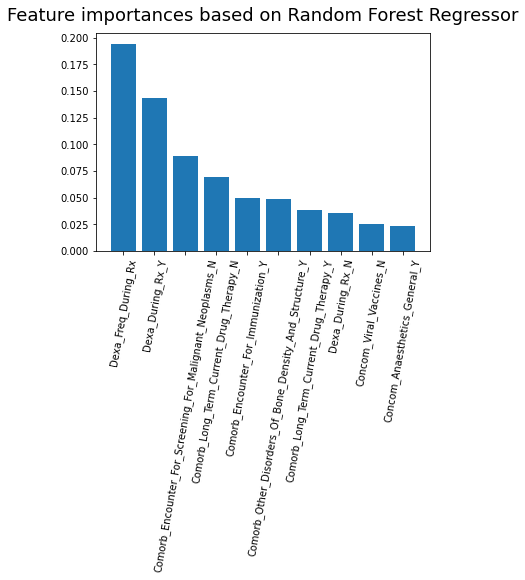

In [13]:
ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = df_new.columns
plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

In [14]:
# svc
svc= SVC(kernel = 'sigmoid', probability=True)
svc.fit(X_balanced, y_balanced)

cv_results = cross_validate(svc, X_balanced, y_balanced, cv=5, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])

# Print average evaluation metrics across all folds
print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std() * 2))
print("F1 score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))

# Generate classification report
y_pred = cross_val_predict(svc, X_balanced, y_balanced, cv=5)
target_names = ['Persistent', 'Non-Persistent']
print(classification_report(y_balanced, y_pred, target_names=target_names))

Precision: 0.73 (+/- 0.05)
Recall: 0.73 (+/- 0.05)
F1 score: 0.73 (+/- 0.05)
Accuracy: 0.73 (+/- 0.05)
                precision    recall  f1-score   support

    Persistent       0.72      0.76      0.74      1815
Non-Persistent       0.75      0.71      0.73      1815

      accuracy                           0.73      3630
     macro avg       0.73      0.73      0.73      3630
  weighted avg       0.73      0.73      0.73      3630



In [15]:
# BNB
bnb= BernoulliNB()
bnb.fit(X_balanced, y_balanced)

cv_results = cross_validate(bnb, X_balanced, y_balanced, cv=5, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])

# Print average evaluation metrics across all folds
print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std() * 2))
print("F1 score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))

# Generate classification report
y_pred = cross_val_predict(bnb, X_balanced, y_balanced, cv=5)
target_names = ['Persistent', 'Non-Persistent']
print(classification_report(y_balanced, y_pred, target_names=target_names))

Precision: 0.78 (+/- 0.04)
Recall: 0.78 (+/- 0.04)
F1 score: 0.78 (+/- 0.04)
Accuracy: 0.78 (+/- 0.04)
                precision    recall  f1-score   support

    Persistent       0.77      0.81      0.79      1815
Non-Persistent       0.80      0.75      0.77      1815

      accuracy                           0.78      3630
     macro avg       0.78      0.78      0.78      3630
  weighted avg       0.78      0.78      0.78      3630



In [16]:
# XGB
xgb = XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yyy = le.fit_transform(y_balanced)

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_balanced.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_balanced.columns.values]
xgb.fit(X_balanced, yyy)

cv_results = cross_validate(xgb, X_balanced, yyy, cv=5, scoring=['precision_macro', 'recall_macro', 'f1_macro', 'accuracy'])

# Print average evaluation metrics across all folds
print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std() * 2))
print("F1 score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))

# Generate classification report
y_pred = cross_val_predict(xgb, X_balanced,yyy, cv=5)
target_names = ['1', '0']
print(classification_report(yyy, y_pred, target_names=target_names))

Precision: 0.84 (+/- 0.14)
Recall: 0.83 (+/- 0.14)
F1 score: 0.83 (+/- 0.14)
Accuracy: 0.83 (+/- 0.14)
              precision    recall  f1-score   support

           1       0.82      0.85      0.83      1815
           0       0.85      0.81      0.83      1815

    accuracy                           0.83      3630
   macro avg       0.83      0.83      0.83      3630
weighted avg       0.83      0.83      0.83      3630



In [17]:
y_test_1 = y_test.copy()
y_test = y_test.replace(['Persistent', 'Non-Persistent'], [1,0])
print(y_test_1.head())
print(y_test.head())

1931    Non-Persistent
1781        Persistent
882     Non-Persistent
564     Non-Persistent
2929    Non-Persistent
Name: Persistency_Flag, dtype: object
1931    0
1781    1
882     0
564     0
2929    0
Name: Persistency_Flag, dtype: int64


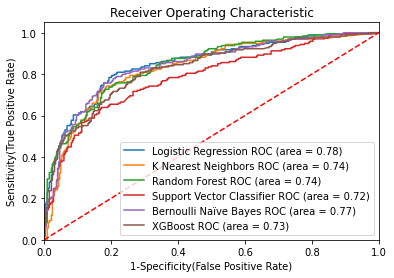

In [18]:
import warnings
warnings.filterwarnings('ignore', message='The feature names should match those that were passed during fit.')


from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()
models_dict = [
    {'label': 'Logistic Regression',
    'model': lr},
    {'label': 'K Nearest Neighbors',
    'model': knn},
    {'label': 'Random Forest',
    'model': rf},
    {'label': 'Support Vector Classifier',
    'model': svc},
    {'label': 'Bernoulli Naïve Bayes',
    'model': bnb}
]

mapping = {'Non-Persistent': 0, 'Persistent': 1}

for m in models_dict:
    pred = m['model'].predict(X_test)
    perd_binary = np.array([mapping[x] for x in pred])
    auc = roc_auc_score(y_test, perd_binary)
    fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

auc = roc_auc_score(y_test, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('XGBoost', auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])


plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
y_pred = lr.predict(X_test)
y_pred_bin = np.array([mapping[x] for x in pred])
print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       320
           1       0.73      0.71      0.72       194

    accuracy                           0.79       514
   macro avg       0.78      0.77      0.78       514
weighted avg       0.79      0.79      0.79       514

